Regression can be a powerful tool to gain insight from labelled data. However, in multiple linear regression, curtain features may be highly correlated leading to overfitting to the training set. In such cases regularization may be used to improve the generality of the model.

The objective function for training any model is to minimize the loss over the training dataset

$$ \arg \min_w \frac{1}{n} \sum_{i=1}^n \ell_w (x_i,y_i) $$

For linear regression the loss function is:

$$ \ell_w (x_i,y_i) = (y - \langle w,x \rangle )^2 = \lVert Aw - z \rVert^2_2 $$

Regularization can help improve the performance of a model by reducing the influence of individual features on overall model.

Ridge regression (Tikhonov regularization, or L2 regulatization) uses a hyperparameter α to penalize the weight assigned in the model to any one feature. the loss function for this technique is:

$$ \ell_w (x_i,y_i) = \lVert Aw - z \rVert^2_2 + \lambda \lVert w\rVert^2_2 $$

Lasso regression (L1 regularization) is another technique to reduce the weights of any individual feature. However, lasso regression tends to favour sparse solutions allowing the feature space to be reduced for the model. the loss function for this model is:

$$ \ell_w (x_i,y_i) = \lVert Aw - z \rVert^2_2 + \lambda \lVert w\rVert_1 $$


Scikit-learn was used to develop these models.

In [89]:
import pandas
import numpy

#Load Ratings dataframe
ratings_df = pandas.read_csv("u.data",
							sep="\t",
							names=["user id", "movie id", "rating", "timestamp"],
							encoding="ISO-8859-1")
ratings_df

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [90]:
#loadinf movies dataframe
movies_df = pandas.read_csv("u.item",
							sep="|",
							encoding="ISO-8859-1",
							names=["movie id", "movie title", "release date", "video release date", "IMDb URL",
									"unknown", "action", "adventure", "animation", "childrens", "comedy", "crime",
									"documentary", "drama", "fantasy", "film-noir", "horror", "musical", "mystery",
								    "romance", "sci-fi", "thriller", "war", "western"])
movies_df

,movie id,movie title,release date,video release date,IMDb URL,unknown,action,adventure,animation,childrens,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
#load User dataframe
user_df = pandas.read_csv("u.user", sep="|", names=["user id", "age", "gender", "occupation", "zip code"], encoding="ISO-8859-1")
user_df

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [92]:
# group the age data into 5 age ranges
user_df["age group"] = pandas.qcut(user_df["age"], q=5, precision=0)

# combine the rating and user dataframes into one
merged_df = pandas.merge(pandas.merge(ratings_df, user_df[["user id", "age group", "gender", "occupation"]],
									  on="user id", how="left"), movies_df, on="movie id", how= "left")

#drop some features that will add noise to data without providing information
merged_df.drop(["movie id", "movie title", "release date", "timestamp", "unknown", "IMDb URL", "video release date"],
			   axis=1, inplace=True)

merged_df

,user id,rating,age group,gender,occupation,action,adventure,animation,childrens,comedy,...,fantasy,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,196,3,"(46.0, 73.0]",M,writer,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,186,3,"(35.0, 46.0]",F,executive,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,22,1,"(23.0, 29.0]",M,writer,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,244,2,"(23.0, 29.0]",M,technician,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,1,"(46.0, 73.0]",M,educator,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,880,3,"(6.0, 23.0]",M,student,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
99996,716,5,"(35.0, 46.0]",F,administrator,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
99997,276,1,"(6.0, 23.0]",M,student,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
99998,13,2,"(46.0, 73.0]",M,educator,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [93]:
#one hot encoding of categorical data
# age range data
merged_df["age group"] = pandas.Categorical(merged_df["age group"])
age_group_dummies = pandas.get_dummies(merged_df["age group"])
#gender
merged_df["gender"] = pandas.Categorical(merged_df["gender"])
gender_dummies = pandas.get_dummies(merged_df["gender"])
#occupation
merged_df["occupation"] = pandas.Categorical(merged_df["occupation"])
occupation_dummies = pandas.get_dummies(merged_df["occupation"])

merged_df = pandas.concat([merged_df, age_group_dummies, gender_dummies, occupation_dummies], axis=1)
merged_df.drop(["age group", "gender", "occupation"], axis=1, inplace=True)

merged_df

,user id,rating,action,adventure,animation,childrens,comedy,crime,documentary,drama,...,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
0,196,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,186,3,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,244,2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,166,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,880,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
99996,716,5,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,276,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
99998,13,2,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn

In [95]:
# whole dataset
x = merged_df.drop("rating", axis=1)
x.columns = x.columns.astype(str)
y = merged_df["rating"]

# train - test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Liner Regression

In [115]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
linear_err = mean_squared_error(y_test, linear_model.predict(x_test))
linear_err

1.1954598871852038

In [116]:
# top features that effect rating
linear_results = pandas.DataFrame({
	"Features": x_train.columns,
	"Coefficient": linear_model.coef_
})

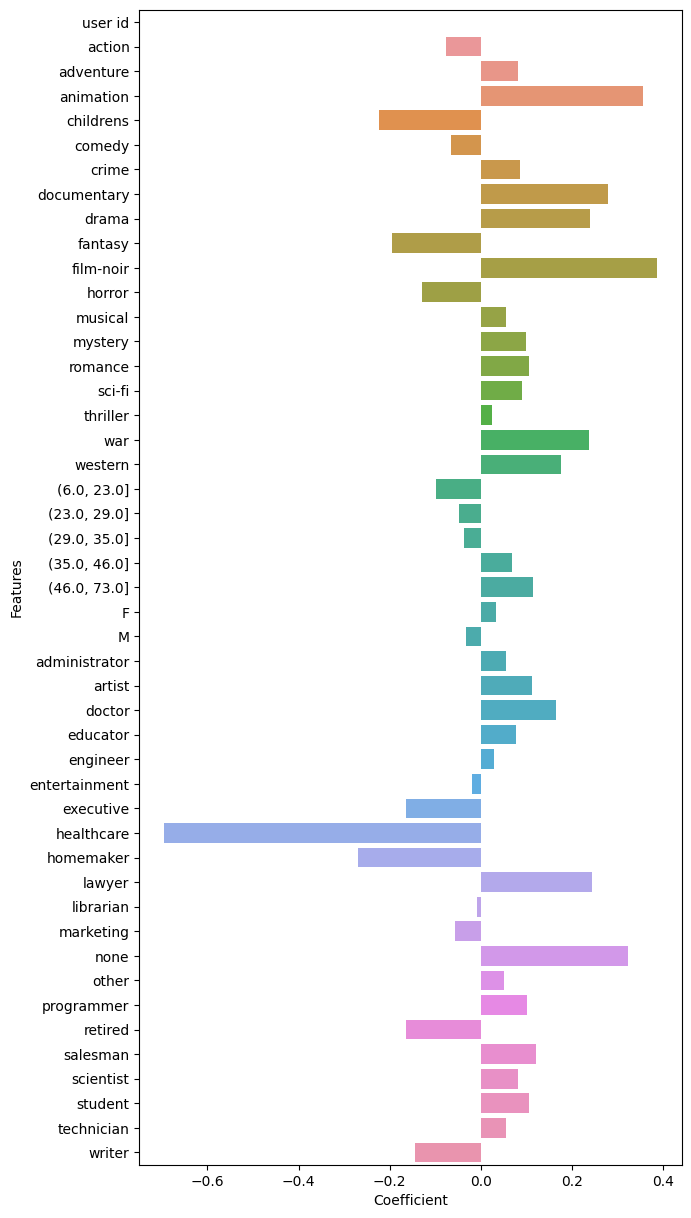

In [117]:
figure, axes = plt.subplots(figsize=[7,15])

seaborn.barplot(x = "Coefficient",
				y = "Features",
				ax = axes,
				data=linear_results)
plt.show()

Ridge Regression is used to create the model

In [97]:
# create the Ridge Model
ridge_model = Ridge()

# create a bunch of alpha values
alpha_length = 7
alpha = []

for i in range(alpha_length):
	alpha.extend(numpy.arange(10**(i-5), 10**(i-4), 10**(i-5)*2))



# use cross-validation to test the different alpha values through k-fold cross validation
parameters = {"alpha": alpha}
num_folds = 5

ridge_cross_validation = GridSearchCV(estimator= ridge_model,
								    param_grid=parameters,
									  scoring="neg_mean_absolute_error",
									  cv= num_folds,
									  return_train_score=True,
									  verbose=1)


In [112]:
parameters

{'alpha': [1e-05,
  3.0000000000000004e-05,
  5.000000000000001e-05,
  7.000000000000002e-05,
  9.000000000000002e-05,
  0.0001,
  0.00030000000000000003,
  0.0005000000000000001,
  0.0007000000000000001,
  0.0009000000000000002,
  0.001,
  0.003,
  0.005,
  0.007,
  0.009000000000000001,
  0.01,
  0.03,
  0.049999999999999996,
  0.06999999999999999,
  0.08999999999999998,
  0.1,
  0.30000000000000004,
  0.5000000000000001,
  0.7000000000000001,
  0.9000000000000001,
  1,
  3,
  5,
  7,
  9,
  10,
  30,
  50,
  70,
  90]}

In [98]:
# fit the grid search to find the best alpha value for this problem.
ridge_cross_validation.fit(x_train, y_train)
ridge_cross_validation.best_estimator_

Fitting 5 folds for each of 35 candidates, totalling 175 fits


Ridge(alpha=1e-05)

In [99]:
best_alpha = 1e-5
best_ridge_alpha = Ridge(alpha=best_alpha)
best_ridge_alpha.fit(x_train, y_train)
r_err = mean_squared_error(y_test, best_ridge_alpha.predict(x_test))
r_err

1.1954598871973383

In [100]:
# top features that effect rating
Ridge_results = pandas.DataFrame({
	"Features": x_train.columns,
	"Coefficient": best_ridge_alpha.coef_
})

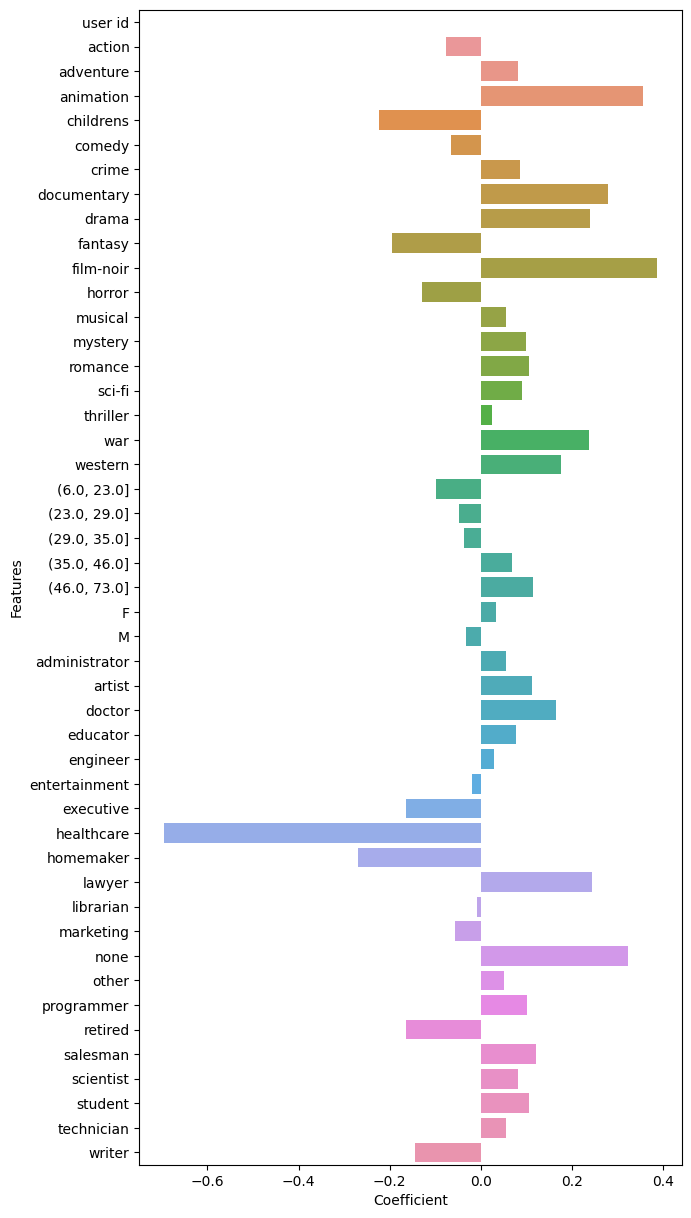

In [101]:
figure, axes = plt.subplots(figsize=[7,15])

seaborn.barplot(x = "Coefficient",
				y = "Features",
				ax = axes,
				data=Ridge_results)
plt.show()

In [102]:
removed_features = (Ridge_results.Coefficient == float(0)).sum()
removed_features

0

In [103]:
Ridge_results.sort_values(by="Coefficient", ascending= False, inplace=True)
Ridge_results.reset_index(inplace=True, drop=True)
Ridge_results

,Features,Coefficient
0,film-noir,0.387148
1,animation,0.356111
2,none,0.322480
3,documentary,0.278451
4,lawyer,0.243158
5,drama,0.240188
6,war,0.237177
7,western,0.177133
8,doctor,0.165527
9,salesman,0.121102


In [104]:
Ridge_results = Ridge_results.iloc[:15]
Ridge_results

,Features,Coefficient
0,film-noir,0.387148
1,animation,0.356111
2,none,0.322480
3,documentary,0.278451
4,lawyer,0.243158
5,drama,0.240188
6,war,0.237177
7,western,0.177133
8,doctor,0.165527
9,salesman,0.121102


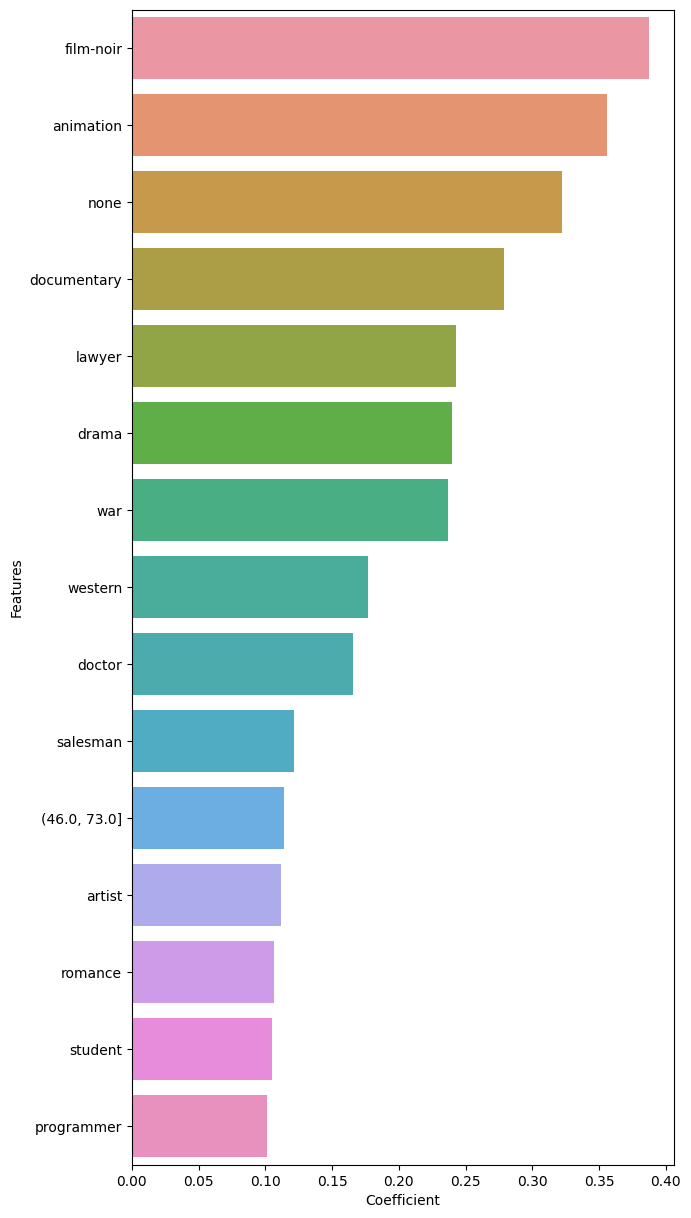

In [105]:
figure, axes = plt.subplots(figsize=[7,15])

seaborn.barplot(x = "Coefficient",
				y = "Features",
				ax = axes,
				data=Ridge_results)
plt.show()

Lasso Regression

In [106]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_cv = GridSearchCV(estimator=lasso_model,
			 param_grid= parameters,
			 scoring= "neg_mean_absolute_error",
			 cv = 5,
			 return_train_score= True,
			 verbose= 1
)
# find the best value of alpha
lasso_cv.fit(x_train, y_train)
l_alpha = lasso_cv.best_estimator_
l_alpha

Fitting 5 folds for each of 35 candidates, totalling 175 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.945e+02, tolerance: 8.115e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.926e+02, tolerance: 8.109e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.897e+02, tolerance: 8.133e

Lasso(alpha=1e-05)

In [107]:
# best_l_alpha = 1e-5

# Train the model
best_lasso_alpha = 1e-5
best_lasso = Lasso(alpha=best_lasso_alpha)

best_lasso.fit(x_train, y_train)

l_err = mean_squared_error(y_test, best_lasso.predict(x_test))
l_err


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.401e+02, tolerance: 1.014e+01
  model = cd_fast.enet_coordinate_descent(


1.195466032036714

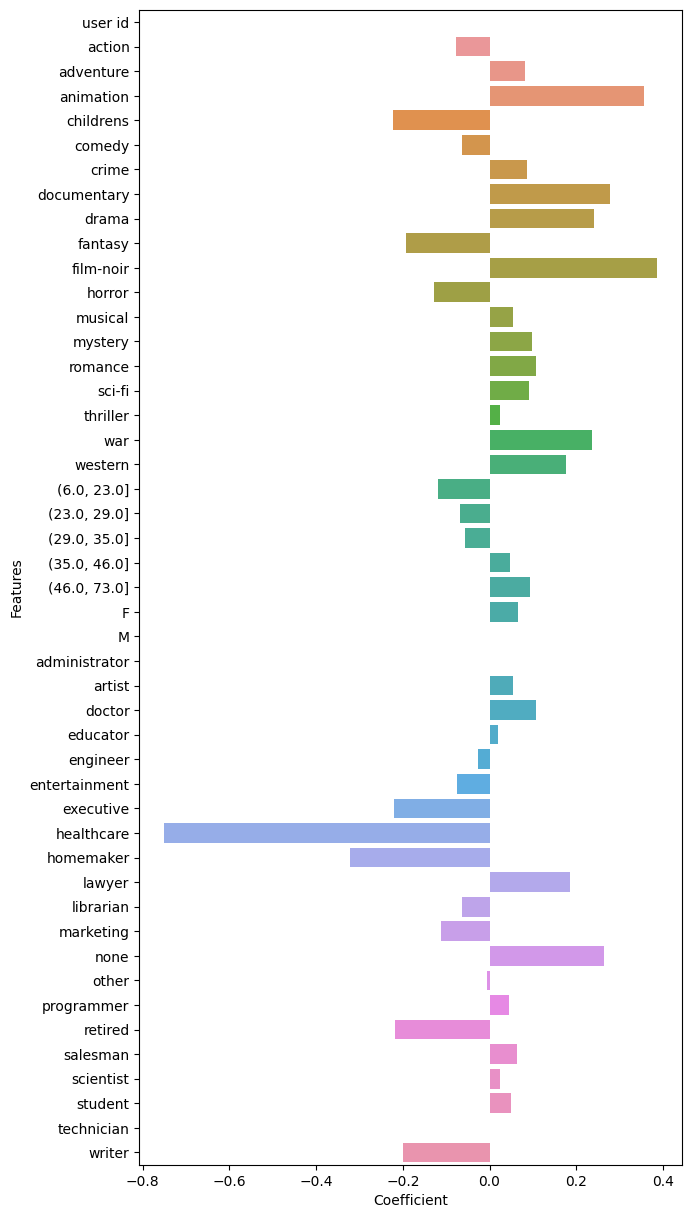

In [108]:
lasso_df = pandas.DataFrame({
	"Features": x_train.columns,
	"Coefficient": best_lasso.coef_})

figure, axes = plt.subplots(figsize=[7,15])

seaborn.barplot(x = "Coefficient",
				y = "Features",
				ax = axes,
				data=lasso_df)
plt.show()

In [109]:
#How many coefficients were removed by lasso regularization

lasso_removed = (lasso_df.Coefficient == float(0)).sum()
lasso_removed

3

In [110]:
# take the top 15 most correlated features
lasso_df.sort_values(by = "Coefficient", ascending=False, inplace=True)
lasso_df.reset_index(inplace=True, drop=True)

lasso_df = lasso_df.iloc[:15]  # take only the top 15 features
lasso_df

,Features,Coefficient
0,film-noir,0.386600
1,animation,0.355539
2,documentary,0.276847
3,none,0.265122
4,drama,0.239998
5,war,0.237054
6,lawyer,0.186275
7,western,0.176408
8,doctor,0.107563
9,romance,0.106651


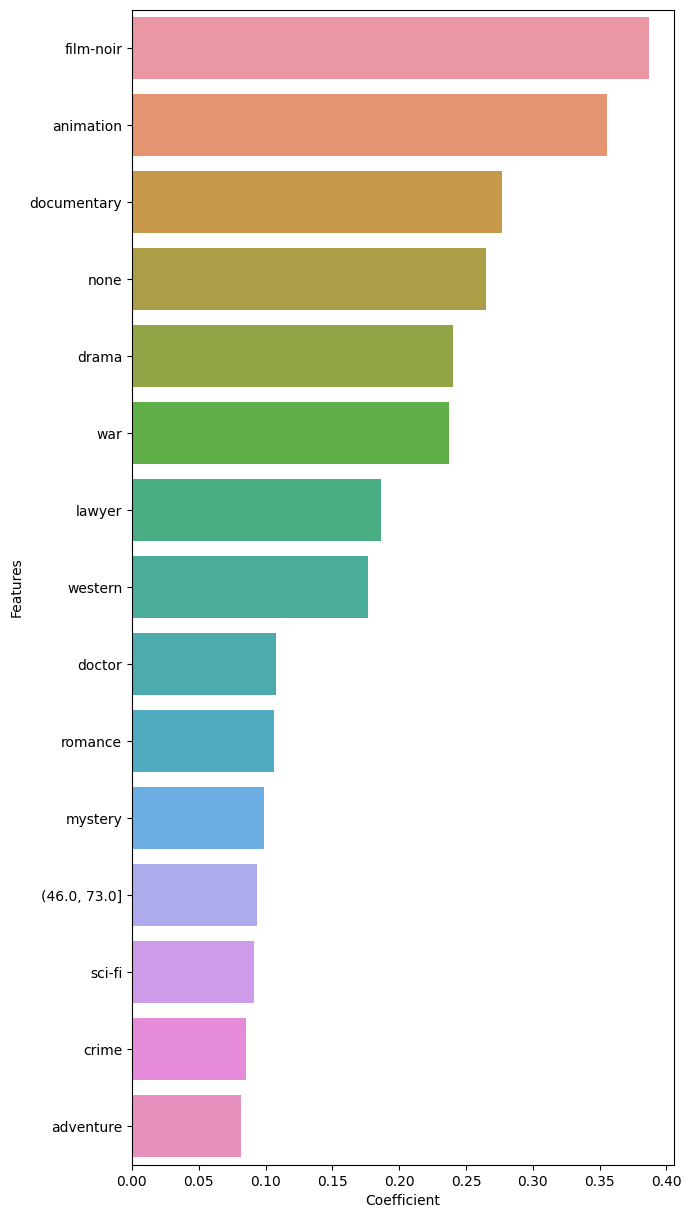

In [111]:
figure, axes = plt.subplots(figsize=[7,15])

seaborn.barplot(x = "Coefficient",
				y = "Features",
				ax = axes,
				data=lasso_df)
plt.show()